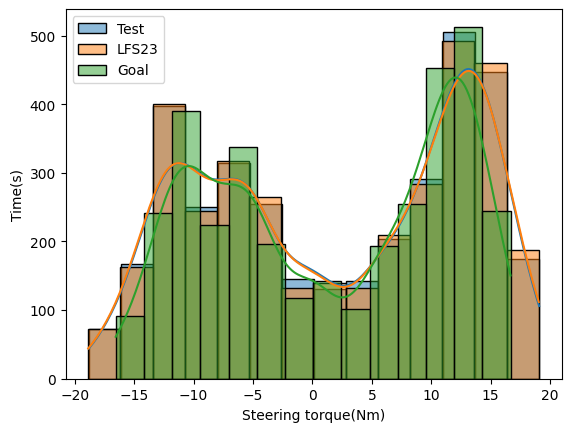

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

upright_steering_arm = 0.055 #55 mm
steering_rack_trail = 0.014 #14 mm

sim_df = pd.read_csv("lfs24_kpi_sweep1.csv");  # LFS23 data file
test_df=pd.read_csv('lfs24_kpi_sweep2.csv') # Sweep data file

def tyre_torque(SA):
    tyre_torque = []
    for angle in SA:
        poly_fit = [ 0.0290895,  -1.21077538, 10.49605838,  5.24555966]
        if angle > 0:
            torque = np.polyval(poly_fit,np.abs(angle))
            tyre_torque.append(torque)
        else:
            torque = np.polyval(poly_fit,np.abs(angle))
            tyre_torque.append(-torque)
    return tyre_torque


mechanical_trail_test = 23.414*10**-3 # Change here when sweeping Castor
scrub_radius_test = 50.198*10**-3 # Change here when sweeping KPI

#--------

#Calculate for test values

st_lat = (test_df['Fy FL'] + test_df['Fy FR'])*mechanical_trail_test
st_lon = (test_df['Fx FL'] + test_df['Fx FR'])*scrub_radius_test
st_tot = st_lat - st_lon

mz_tyre_FL_test = tyre_torque(test_df['FL slip angle'])
mz_tyre_FR_test = tyre_torque(test_df['FR slip angle'])

mz_tyre_FL_test = np.array(mz_tyre_FL_test)
mz_tyre_FR_test = np.array(mz_tyre_FR_test)
st_tot=np.array(st_tot)

tot_torque =  (mz_tyre_FL_test + mz_tyre_FR_test + st_tot)/upright_steering_arm * steering_rack_trail
sns.histplot(tot_torque, label='Test', kde=True)
#--------

#Calculate for LFS23 and goal values

scrub_radius_base = 50.198*10**-3
scrub_radius_goal = 25*10**-3
scrub = [scrub_radius_base,scrub_radius_goal]

mechanical_trail_base = 24.412*10**-3
mechanical_trail_goal = 6.2*10**-3
trail = [mechanical_trail_base,mechanical_trail_goal]
names = ['LFS23', 'Goal']

for scrub_radius,mechanical_trail,name in zip(scrub,trail,names):
    steering_torque_lateral = (sim_df['Fy FL'] + sim_df['Fy FR'])*mechanical_trail
    steering_torque_longitudunal = (sim_df['Fx FL'] + sim_df['Fx FR'])*scrub_radius
    steering_torque_tot = steering_torque_lateral - steering_torque_longitudunal

    mz_tyre_FL = tyre_torque(sim_df['FL slip angle'])
    mz_tyre_FR = tyre_torque(sim_df['FR slip angle'])

    mz_tyre_FL = np.array(mz_tyre_FL)
    mz_tyre_FR = np.array(mz_tyre_FR)
    steering_torque_tot = np.array(steering_torque_tot)
    total_torque = (mz_tyre_FL + mz_tyre_FR + steering_torque_tot)/upright_steering_arm * steering_rack_trail

    # plt.plot(steering_torque_tot, label = 'Self Calculated')
    sns.histplot(total_torque,label = name, kde = True)


plt.xlabel('Steering torque(Nm)')
plt.ylabel('Time(s)')
plt.legend()
plt.show()